KNN algorithm for classifying different stars into classes.

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
url = "https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv"
df = pd.read_csv(url)
df = df.dropna()
print(df.head(3))

   Temperature       L       R    A_M Color Spectral_Class  Type
0         3068  0.0024  0.1700  16.12   Red              M     0
1         3042  0.0005  0.1542  16.60   Red              M     0
2         2600  0.0003  0.1020  18.70   Red              M     0


Convert categorial features to discerete values

In [11]:
# converting string features to discrete values

colors = df['Color'].unique()
for idx, color in enumerate(colors):
  df['Color'] = df['Color'].replace({color: idx})

spec_class = df['Spectral_Class'].unique()
for idx, spec in enumerate(spec_class):
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})
df.head(3)

C:\Users\sharo\AppData\Local\Temp\ipykernel_15536\1466839749.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Color'] = df['Color'].replace({color: idx})
C:\Users\sharo\AppData\Local\Temp\ipykernel_15536\1466839749.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,0,0,0
1,3042,0.0005,0.1542,16.60,0,0,0
2,2600,0.0003,0.1020,18.70,0,0,0


Checking the correlation matrix to find if the features are strongly correlated (which impacts if a distance function that resolves correlation should be used)

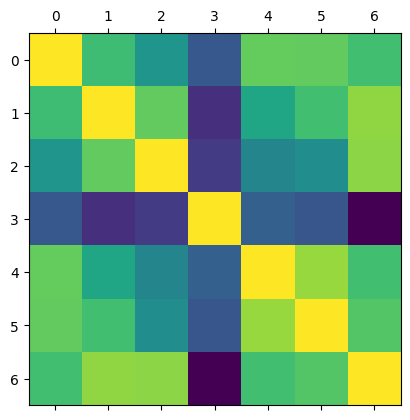

In [12]:

import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop('Type', axis=1)
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=42, stratify=y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Euclidean distance calculations

In [14]:
def Euclidean(test, data):
    distances = np.zeros((test.shape[0], data.shape[0]))

    test_mean = test.mean()
    test_std = test.std()
    new_test = (test - test_mean) / test_std
    
    data_mean = data.mean()
    data_std = data.std()
    new_data = (data - data_mean) / data_std

    for i in range(test.shape[0]):
      for j in range(data.shape[0]):
         addUp = 0
         for m in range(data.shape[1]):
            addUp = addUp + pow(new_test[i,m] - new_data[j,m], 2)
         distances[i,j] = np.sqrt(addUp)
    return distances


def Mahalanobis(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)

  # Calculate the Mahalanobis distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff =  test[i] - data[j]
          distances[i, j] = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance_matrix_data)), diff.T))
  return distances

Finding classification predictions based on KNN

In [15]:
def kNN_classify(data, labels, test, k, metric, p = 1):
  if (metric == 'Minkowski'):
    arguments = (test, data, p)
  else:
    arguments = (test, data)
  distances = eval(f'{metric}(*arguments)')  #returns np[][] |test| X |data| by the given metric.
  
  #implement here
  k_nearest_labels = np.zeros(test.shape[0])
  for i in range(test.shape[0]):
    sorted_distances = np.argsort(distances[i])
    closest = sorted_distances[:k]
    closest_labels = labels.iloc[closest]
    label_predict = closest_labels.mode()[0]
    k_nearest_labels[i] = label_predict

  return k_nearest_labels
  

Euclidean vs. Mahalabonis distance

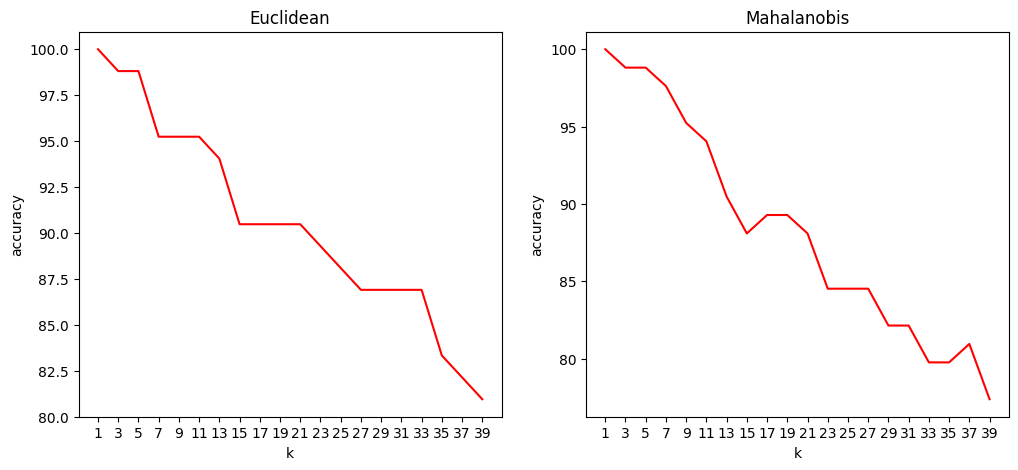

In [16]:
from sklearn.metrics import accuracy_score

metrics = ['Euclidean', 'Mahalanobis']
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for idx, metric in enumerate(metrics):

  ks = np.arange(1, 41, 2)
  accs = []
  for k in ks:
    c = kNN_classify(X_train, y_train, X_test, k, metric)
    accs.append(100 * accuracy_score(y_test, c))
       # Implement here

  axs[idx % 2].plot(ks, accs, color='red')
  axs[idx % 2].set_xlabel('k')
  axs[idx % 2].set_ylabel('accuracy')
  axs[idx % 2].set_title(metric)
  axs[idx % 2].set_xticks(ks)
plt.show()